In [109]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import seaborn as sns
import numpy as np
from scipy.spatial.distance import pdist, squareform
import time
import timeit

In [110]:
dataset = pd.read_csv("./labels/Iris.csv")
dataset

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]

# Descriptive Statistics of all the data attributes

In [111]:
dataset.describe()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000

# Box Plot of All the data attributes

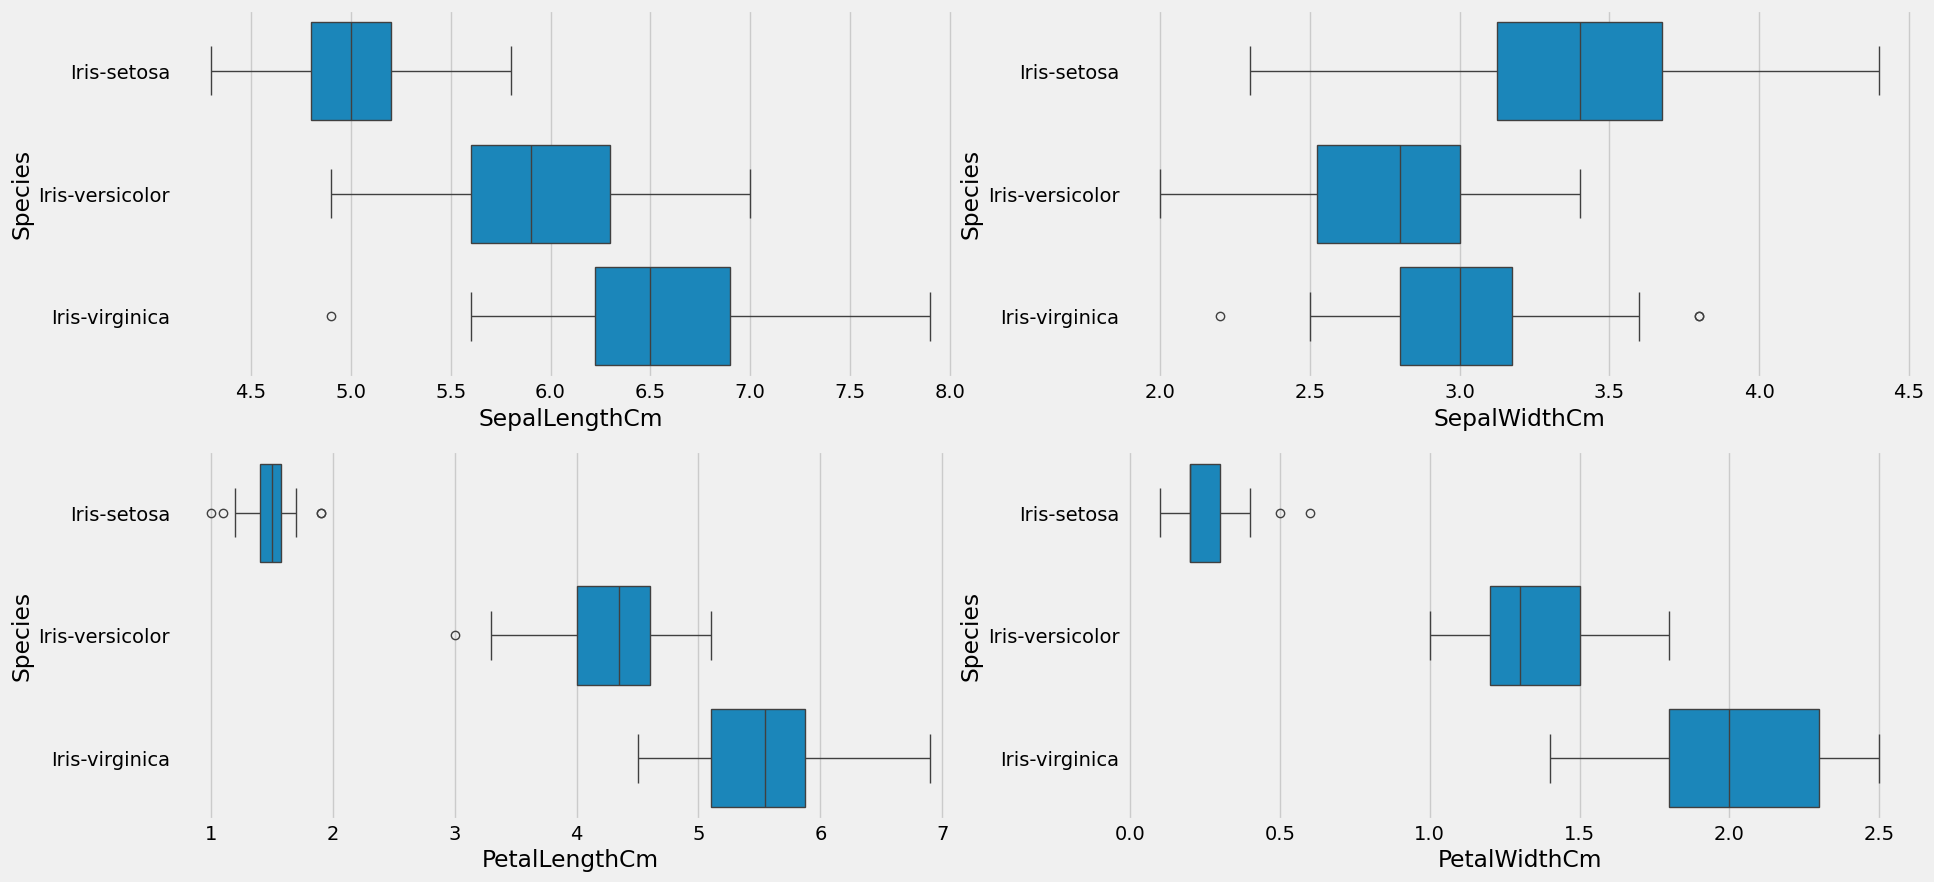

In [112]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
plt1 = sns.boxplot(data=dataset,x="SepalLengthCm", y="Species",  ax=axs[0][0])
plt2 = sns.boxplot(data=dataset, x="SepalWidthCm", y="Species", ax=axs[0][1])
plt3 = sns.boxplot(data=dataset, x="PetalLengthCm", y="Species", ax=axs[1][0])
plt4 = sns.boxplot(data=dataset, x="PetalWidthCm", y="Species", ax=axs[1][1])

In [113]:
# Get number of rows in the dataset
num_rows = dataset.shape[0]

# Set seed for reproducibility (optional)
np.random.seed(0)

# Randomly select 50 indices
random_indices = np.random.choice(num_rows, size=50, replace=False)

# Get random 50 data points
random_iris_data = dataset.iloc[random_indices]

# Display the random 50 data points
print(random_iris_data)
random_iris_data.to_csv("./labels/random_iris_data.csv", index=False)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm          Species
114            5.8           2.8            5.1           2.4   Iris-virginica
62             6.0           2.2            4.0           1.0  Iris-versicolor
33             5.5           4.2            1.4           0.2      Iris-setosa
107            7.3           2.9            6.3           1.8   Iris-virginica
7              5.0           3.4            1.5           0.2      Iris-setosa
100            6.3           3.3            6.0           2.5   Iris-virginica
40             5.0           3.5            1.3           0.3      Iris-setosa
86             6.7           3.1            4.7           1.5  Iris-versicolor
76             6.8           2.8            4.8           1.4  Iris-versicolor
71             6.1           2.8            4.0           1.3  Iris-versicolor
134            6.1           2.6            5.6           1.4   Iris-virginica
51             6.4           3.2            4.5     

In [114]:
random_iris_data.describe()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count      50.000000     50.000000       50.00000     50.000000
mean        5.772000      3.028000        3.74600      1.192000
std         0.704516      0.449961        1.67359      0.724735
min         4.400000      2.000000        1.00000      0.100000
25%         5.125000      2.800000        1.62500      0.400000
50%         5.850000      3.000000        4.45000      1.400000
75%         6.275000      3.300000        4.97500      1.750000
max         7.300000      4.200000        6.30000      2.500000

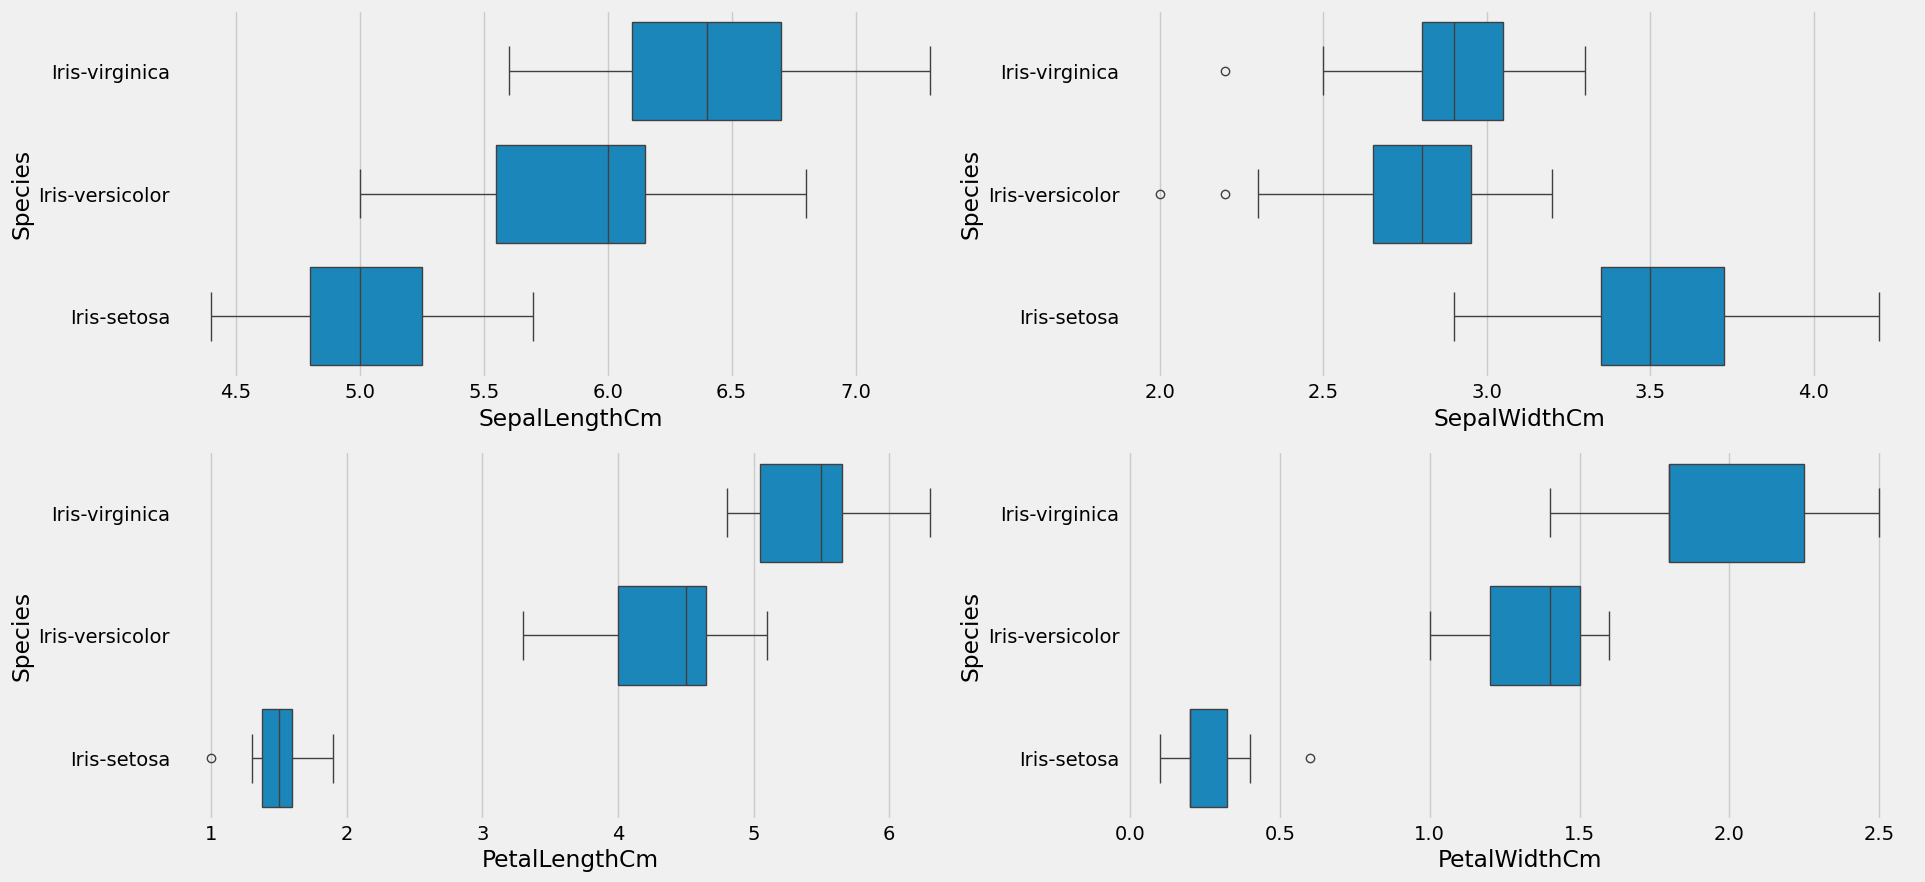

In [115]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
plt1 = sns.boxplot(data=random_iris_data, x="SepalLengthCm", y="Species", ax=axs[0][0])
plt2 = sns.boxplot(data=random_iris_data, x="SepalWidthCm", y="Species", ax=axs[0][1])
plt3 = sns.boxplot(
    data=random_iris_data, x="PetalLengthCm", y="Species", ax=axs[1][0]
)
plt4 = sns.boxplot(data=random_iris_data, x="PetalWidthCm", y="Species", ax=axs[1][1])

In [116]:
feature_columns = dataset.columns[:-1]
data_features = dataset[feature_columns].values


In [117]:
# Extract the first four attributes as vectors
points = dataset.iloc[:, :4].values

# Manhattan Distance

In [118]:
def manhattan_distance_matrix(data):
    """
    Custom function to calculate Manhattan Distance
    """
    num_points = data.shape[0]
    distance_matrix = np.zeros((num_points, num_points))
    # print(distance_matrix)

    for i in range(num_points):
        for j in range(num_points):
            distance_matrix[i, j] = np.sum(np.abs(data[i] - data[j]))

    return distance_matrix


# Alternative way using scipy package
# manhattan_distance_matrix = squareform(pdist(points, metric="cityblock"))

manhattan_distance_matrix_data = manhattan_distance_matrix(data_features)
manhattan_distance_matrix_data

array([[0. , 0.7, 0.8, ..., 7.5, 7.3, 6.6],
       [0.7, 0. , 0.5, ..., 7.2, 7.8, 6.3],
       [0.8, 0.5, 0. , ..., 7.7, 7.9, 6.8],
       ...,
       [7.5, 7.2, 7.7, ..., 0. , 1.2, 0.9],
       [7.3, 7.8, 7.9, ..., 1.2, 0. , 1.5],
       [6.6, 6.3, 6.8, ..., 0.9, 1.5, 0. ]])

# Euclidean Distance

In [119]:
def euclidean_distance_matrix(data):
    """
    Custom function to calculate Euclidean Distance
    """
    num_points = data.shape[0]
    distance_matrix = np.zeros((num_points, num_points))

    for i in range(num_points):
        for j in range(num_points):
            distance_matrix[i, j] = np.sqrt(np.sum((data[i] - data[j])**2))

    return distance_matrix


# Alternative way using scipy package
# euclidean_distance_matrix = squareform(pdist(points, metric="euclidean"))

euclidean_distance_matrix_data = euclidean_distance_matrix(data_features)
euclidean_distance_matrix_data

array([[0.        , 0.53851648, 0.50990195, ..., 4.45982062, 4.65080638,
        4.14004831],
       [0.53851648, 0.        , 0.3       , ..., 4.49888875, 4.71805044,
        4.15331193],
       [0.50990195, 0.3       , 0.        , ..., 4.66154481, 4.84871117,
        4.29883705],
       ...,
       [4.45982062, 4.49888875, 4.66154481, ..., 0.        , 0.6164414 ,
        0.64031242],
       [4.65080638, 4.71805044, 4.84871117, ..., 0.6164414 , 0.        ,
        0.76811457],
       [4.14004831, 4.15331193, 4.29883705, ..., 0.64031242, 0.76811457,
        0.        ]])

# Chebyshev Distance

In [120]:
def chebyshev_distance_matrix(data):
    """
    Custom function to calculate Chebyshev Distance
    """
    num_points = data.shape[0]
    distance_matrix = np.zeros((num_points, num_points))

    for i in range(num_points):
        for j in range(num_points):
            distance_matrix[i, j] = np.max(np.abs(data[i] - data[j]))

    return distance_matrix


# Alternative way using scipy package
# chebyshev_distance_matrix = squareform(pdist(points, metric="chebyshev"))

chebyshev_distance_matrix_data = chebyshev_distance_matrix(data_features)
chebyshev_distance_matrix_data

array([[0. , 0.5, 0.4, ..., 3.8, 4. , 3.7],
       [0.5, 0. , 0.2, ..., 3.8, 4. , 3.7],
       [0.4, 0.2, 0. , ..., 3.9, 4.1, 3.8],
       ...,
       [3.8, 3.8, 3.9, ..., 0. , 0.4, 0.6],
       [4. , 4. , 4.1, ..., 0.4, 0. , 0.5],
       [3.7, 3.7, 3.8, ..., 0.6, 0.5, 0. ]])

# Mahalanobis Distance

In [121]:
# need to compute the inverse of the covariance matrix
def mahalanobis_distance_matrix(data):
    num_points = data.shape[0]
    distance_matrix = np.zeros((num_points, num_points))
    cov_matrix = np.cov(data, rowvar=False)
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    for i in range(num_points):
        for j in range(num_points):
            delta = data[i] - data[j]
            distance_matrix[i, j] = np.sqrt(
                np.dot(np.dot(delta, inv_cov_matrix), delta.T)
            )
    return distance_matrix

# cov_matrix = np.cov(points, rowvar=False)
# inv_cov_matrix = np.linalg.inv(cov_matrix)
# mahalanobis_distance_matrix_data = squareform(
#     pdist(points, metric="mahalanobis", VI=inv_cov_matrix)
# )

mahalanobis_distance_matrix_data = mahalanobis_distance_matrix(data_features)
mahalanobis_distance_matrix_data

array([[0.        , 1.35971517, 0.96949963, ..., 2.45066493, 3.50495016,
        2.89533797],
       [1.35971517, 0.        , 0.97318639, ..., 2.54627836, 4.05670054,
        3.2991554 ],
       [0.96949963, 0.97318639, 0.        , ..., 2.45764476, 3.45338089,
        2.67881128],
       ...,
       [2.45066493, 2.54627836, 2.45764476, ..., 0.        , 2.20436091,
        2.20685388],
       [3.50495016, 4.05670054, 3.45338089, ..., 2.20436091, 0.        ,
        2.00393111],
       [2.89533797, 3.2991554 , 2.67881128, ..., 2.20685388, 2.00393111,
        0.        ]])

# Measurement of computational complexity

In [122]:
start_time = time.time()
manhattan_distance_matrix_data = squareform(pdist(points, metric="cityblock"))
manhattan_time = time.time() - start_time
print(f"Manhattan Time: {manhattan_time}")

Manhattan Time: 0.001768350601196289


In [123]:
start_time = time.time()
euclidean_distance_matrix_data = squareform(pdist(points, metric="euclidean"))
euclidean_time = time.time() - start_time
print(f"Euclidean Time: {euclidean_time}")

Euclidean Time: 0.00096893310546875


In [124]:
start_time = time.time()
chebyshev_distance_matrix_data = squareform(pdist(points, metric="chebyshev"))
chebyshev_time = time.time() - start_time
print(f"Chebyshev Time: {chebyshev_time}")

Chebyshev Time: 0.0017075538635253906


In [125]:
start_time = time.time()
cov_matrix = np.cov(points, rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)
mahalanobis_distance_matrix_data = squareform(
    pdist(points, metric="mahalanobis", VI=inv_cov_matrix)
)
mahalanobis_time = time.time() - start_time
print(f"Mahalanobis Time: {mahalanobis_time}")

Mahalanobis Time: 0.0030982494354248047
